In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


# MITBIH Dataset

In [2]:
train_df_mitbih = pd.read_csv('mitbih_train.csv', header=None)
train_df_mitbih

In [4]:
equilibre=train_df_mitbih[187].value_counts()

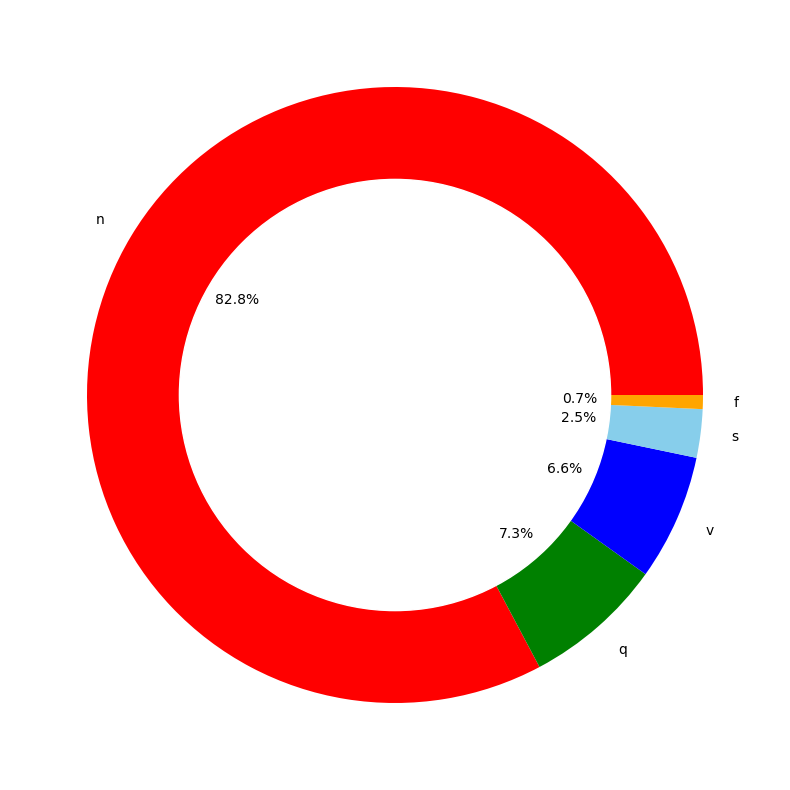

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [7]:
# Count the number of each class
train_df_mitbih[187].value_counts()


187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

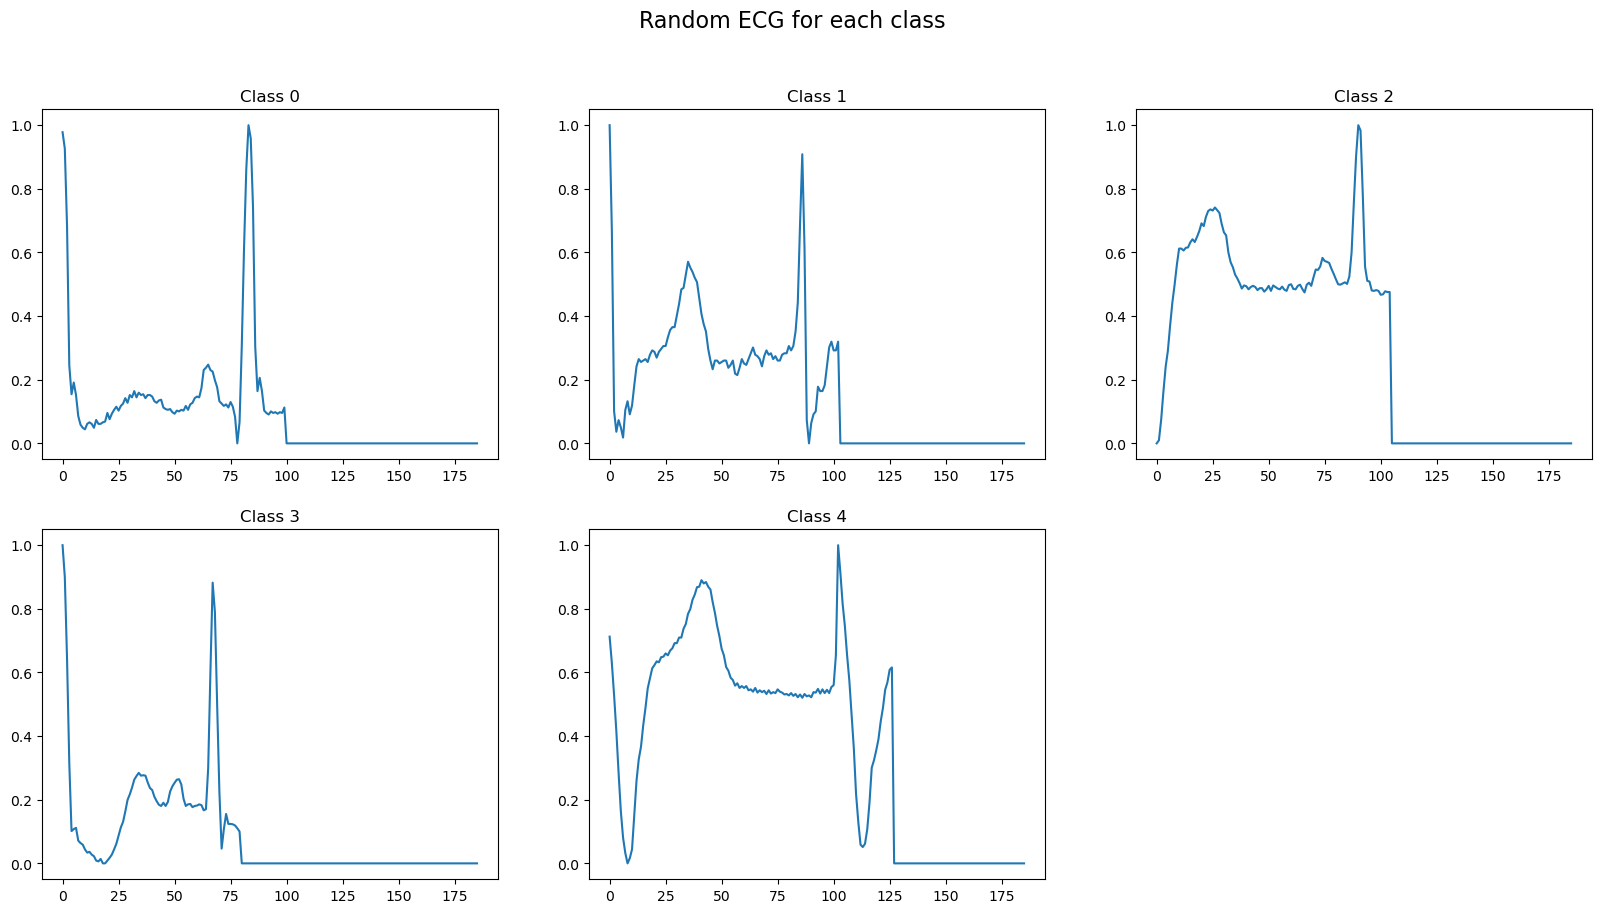

In [52]:
# Plot a random sample of each class
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(train_df_mitbih[train_df_mitbih[187]==i].iloc[0,:186])
    plt.title('Class '+str(i))
# Big title for all
plt.suptitle('Random ECG for each class', size=16)
plt.show()

In [8]:
# Total number of rows
total_rows = train_df_mitbih.shape[0]
total_rows/5

17510.8

In [9]:
# Balance the dataset by sampling each class to have 17500 samples
df_n = train_df_mitbih[train_df_mitbih[187]==0].sample(n=17500, random_state=42)
# Upsample the other classes to have 17500 samples
df_q = train_df_mitbih[train_df_mitbih[187]==1].sample(n=17500, random_state=42, replace=True)
df_v = train_df_mitbih[train_df_mitbih[187]==2].sample(n=17500, random_state=42, replace=True)
df_s = train_df_mitbih[train_df_mitbih[187]==3].sample(n=17500, random_state=42, replace=True)
df_f = train_df_mitbih[train_df_mitbih[187]==4].sample(n=17500, random_state=42, replace=True)

In [10]:
# Train and test data after balancing
train_df_mitbih_balanced = pd.concat([df_n, df_q, df_v, df_s, df_f])
train_df_mitbih_balanced

test_df_mitbih = pd.read_csv('mitbih_test.csv', header=None)
test_df_mitbih

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [11]:
# Count the number of each class
train_df_mitbih_balanced[187].value_counts()

187
0.0    17500
1.0    17500
2.0    17500
3.0    17500
4.0    17500
Name: count, dtype: int64

### Random Forest Model

In [53]:
# Create a classificaiton model using the balanced dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train = train_df_mitbih_balanced.iloc[:, :-1].values
y_train = train_df_mitbih_balanced.iloc[:, -1].values
X_test = test_df_mitbih.iloc[:, :-1].values
y_test = test_df_mitbih.iloc[:, -1].values

# Train the model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.81      0.75      0.78       556
         2.0       0.93      0.93      0.93      1448
         3.0       0.79      0.76      0.77       162
         4.0       0.98      0.97      0.97      1608

    accuracy                           0.98     21892
   macro avg       0.90      0.88      0.89     21892
weighted avg       0.98      0.98      0.98     21892

Accuracy Score:  0.9756532066508313


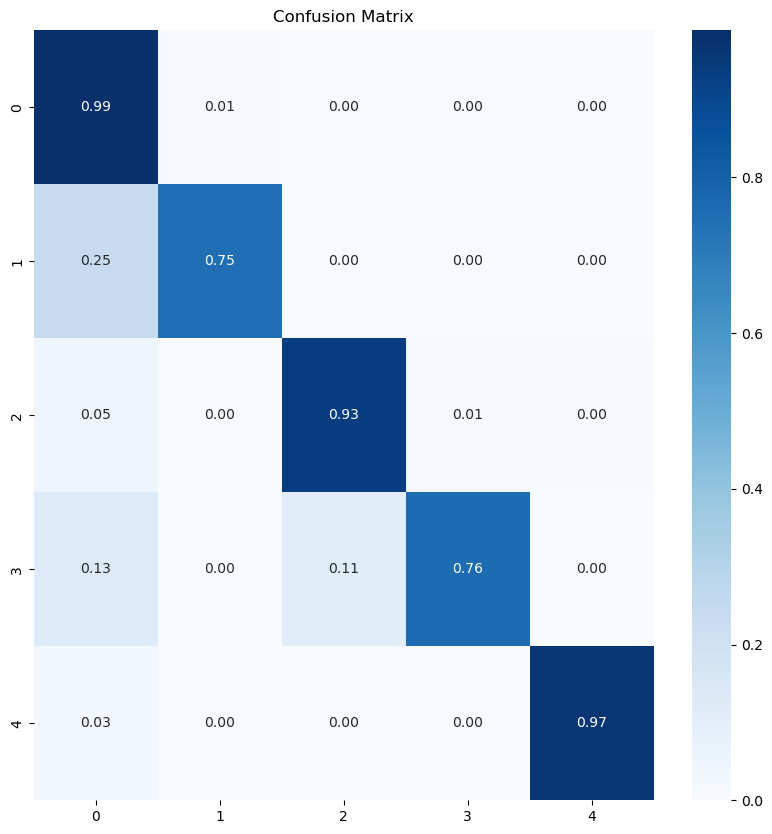

In [66]:
# Predict the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
# Plot the confusion matrix by normalizing the values
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Convolutional Neural Network for Classification

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


# Create a deep convolutional neural network model with residual connections
# Input: 187 features
# Output: 5 classes
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, 5)
        self.conv2 = nn.Conv1d(32, 64, 5)
        self.conv3 = nn.Conv1d(64, 128, 5)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(128*19, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 5)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = nn.Flatten()(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Summary of the model
model = Net()
summary(model, (1, 187))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #


            Conv1d-1              [-1, 32, 183]             192
         MaxPool1d-2               [-1, 32, 91]               0
            Conv1d-3               [-1, 64, 87]          10,304
         MaxPool1d-4               [-1, 64, 43]               0
            Conv1d-5              [-1, 128, 39]          41,088
         MaxPool1d-6              [-1, 128, 19]               0
            Linear-7                  [-1, 512]       1,245,696
            Linear-8                  [-1, 128]          65,664
            Linear-9                    [-1, 5]             645
Total params: 1,363,589
Trainable params: 1,363,589
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 5.20
Estimated Total Size (MB): 5.39
----------------------------------------------------------------


In [43]:
# Convert the dataset to PyTorch tensors
class ECGDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [44]:
X_train = train_df_mitbih_balanced.iloc[:, :-1].values
y_train = train_df_mitbih_balanced.iloc[:, -1].values
X_test = test_df_mitbih.iloc[:, :-1].values
y_test = test_df_mitbih.iloc[:, -1].values

train_dataset = ECGDataset(X_train, y_train)
test_dataset = ECGDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [69]:
from tqdm.auto import tqdm

# Train the model
model.train()
epochs = 20
for epoch in range(epochs):
    train_loss = 0
    train_acc = 0
    loop = tqdm(train_loader, leave=True)
    for batch, (X, y) in enumerate(loop):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        loop.set_description(f"Epoch [{epoch}/{5}]")
        loop.set_postfix(loss=loss.item())
        train_loss += loss.item()
        train_acc += (output.argmax(1) == y).sum().item()
    print(f"Epoch [{epoch}/{epochs}], Loss: {train_loss/len(train_loader)}, Accuracy: {train_acc/len(train_dataset)}")
     

Epoch [0/20], Loss: 0.031111307226079556, Accuracy: 0.9897142857142858


Epoch [1/20], Loss: 0.023763177864731266, Accuracy: 0.9928


Epoch [2/20], Loss: 0.022121517447699555, Accuracy: 0.9929714285714286


Epoch [3/20], Loss: 0.019738301141278603, Accuracy: 0.9937485714285714


Epoch [4/20], Loss: 0.015539909358836422, Accuracy: 0.9951771428571429


Epoch [5/20], Loss: 0.014550008085122941, Accuracy: 0.9956457142857142


Epoch [6/20], Loss: 0.015646593465204226, Accuracy: 0.9955085714285714


Epoch [7/20], Loss: 0.010785784878282878, Accuracy: 0.9968685714285714


Epoch [8/20], Loss: 0.01179583040012185, Accuracy: 0.99648


Epoch [9/20], Loss: 0.012135963096433956, Accuracy: 0.9965257142857142


Epoch [10/20], Loss: 0.00964214880369806, Accuracy: 0.9972


Epoch [11/20], Loss: 0.007946774783488908, Accuracy: 0.9976342857142857


Epoch [12/20], Loss: 0.009694969508191926, Accuracy: 0.9972


Epoch [13/20], Loss: 0.009405895487928143, Accuracy: 0.9972342857142857


Epoch [14/20], Loss: 0.007027876787809652, Accuracy: 0.9981485714285714


Epoch [15/20], Loss: 0.007916199144470207, Accuracy: 0.9978285714285714


Epoch [16/20], Loss: 0.0066550432535011665, Accuracy: 0.9984342857142857


Epoch [17/20], Loss: 0.007825923903030545, Accuracy: 0.9977828571428572


Epoch [18/20], Loss: 0.006979378968842287, Accuracy: 0.9980114285714285


Epoch [19/20], Loss: 0.004814340424660941, Accuracy: 0.9986857142857143


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.74      0.84      0.78       556
           2       0.92      0.95      0.93      1448
           3       0.73      0.80      0.76       162
           4       0.98      0.99      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.87      0.91      0.89     21892
weighted avg       0.98      0.98      0.98     21892

Accuracy Score: 0.9765667823862598


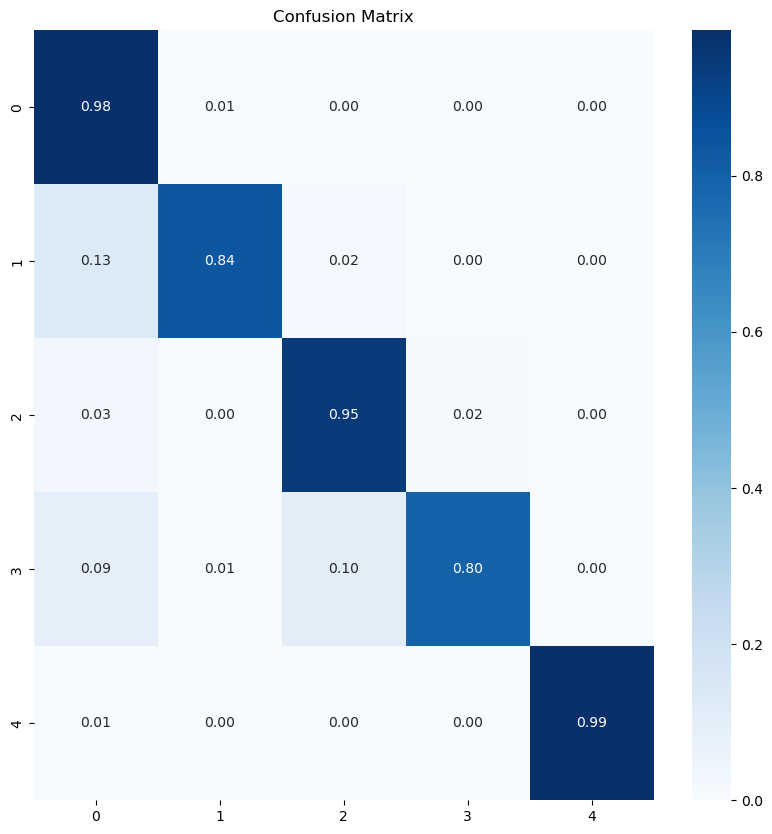

In [70]:
# Test the model in the test dataset
model.eval()
test_acc = 0

# Classification report
y_pred = []
y_true = []
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    output = model(X)
    y_pred.extend(output.argmax(1).tolist())
    y_true.extend(y.tolist())
    test_acc += (output.argmax(1) == y).sum().item()
print(classification_report(y_true, y_pred))
print(f"Accuracy Score: {test_acc/len(test_dataset)}")


# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()